In [62]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

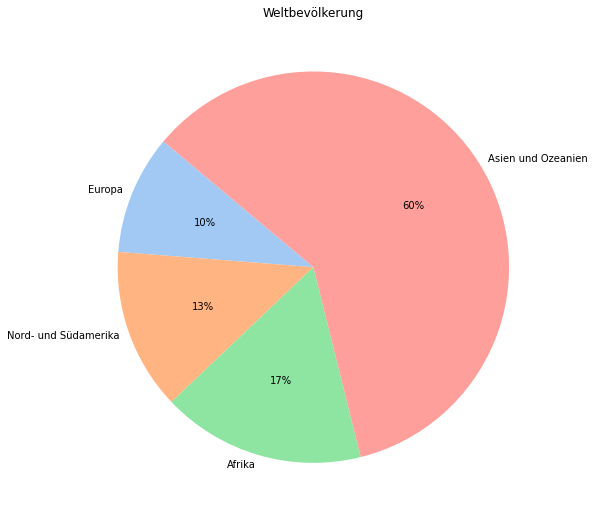

In [63]:
d = pd.Series([0.74, 1, 1.26, 4.5], 
              index=['Europa', 'Nord- und Südamerika', 'Afrika', 'Asien und Ozeanien'])

_, ax = plt.subplots(figsize=(9,9))

colors = sns.color_palette('pastel')

ax.pie(d,
       labels=d.index,
       autopct='%.0f%%',
       colors = colors,
       labeldistance=1.05,
       startangle=140);

ax.set_title('Weltbevölkerung');


In [64]:
df = pd.read_csv('wpd_datasets.csv', header=[0,1])
df.head()

Europa            Nordamerkia               Ozeanien            \
             X         Y            X         Y            X         Y   
0  1951.130246  4.023655  1950.071743  4.847215  1950.133172  5.189200   
1  1955.206788  4.016939  1955.057112  5.019491  1955.335376  5.314900   
2  1961.473224  3.933070  1961.142471  4.733502  1960.723700  5.223031   
3  1980.240215  3.098554  1973.482805  3.135663  1972.901064  4.643284   
4  1991.404002  2.876057  1978.893592  2.810640  1979.048769  4.077520   

          Welt                  Asien           Lateinamerika            \
             X         Y            X         Y             X         Y   
0  1950.747003  5.919928  1950.545067  6.362881   1950.695430  6.394008   
1  1954.686476  5.866545  1954.006861  6.247198   1961.462910  6.427886   
2  1960.669606  5.906955  1966.734106  6.266039   1979.955762  5.500034   
3  1966.037988  5.838398  1973.980884  5.863771   1989.905870  4.834218   
4  1973.362010  5.552730  1978.496138  5.344216   1998.667971  4.315763   

        Afrika            
             X         Y  
0  1950.035757  6.751350  
1  1959.885241  6.823850  
2  1970.929380  6.741219  
3  1983.218829  6.651139  
4  1989.388079  6.473981

In [65]:
df_i = pd.DataFrame(index=np.arange(1950, 2011, 10))
df_i.index.name = 'Jahr'

for key in df.columns.get_level_values(0).unique():
    ii = df.loc[:, key].dropna()

    df_i[key] = np.interp(df_i.index , ii['X'], ii['Y'])
    
df_i.head()

,Europa,Nordamerkia,Ozeanien,Welt,Asien,Lateinamerika,Afrika
Jahr,,,,,,,
1950,4.023655,4.847215,5.189200,5.919928,6.362881,6.394008,6.751350
1960,3.952787,4.787194,5.235370,5.902433,6.256070,6.423283,6.822992
1970,3.553908,3.586620,4.781400,5.683863,6.084750,5.999550,6.748173
1980,3.109235,2.818446,4.055964,5.107236,5.258637,5.497074,6.674733
1990,2.904039,2.958011,3.829361,4.758245,4.811085,4.828649,6.451315


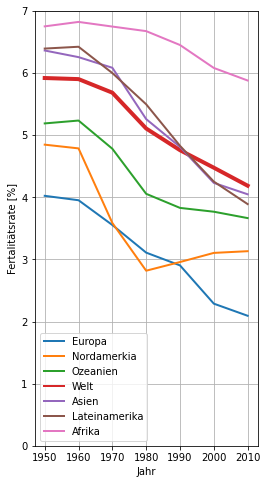

In [66]:
ax = df_i.plot(grid=True, 
               figsize=(4, 8),
               linewidth=2);

ax.set_ylabel("Fertalitätsrate [%]");
ax.set_ylim([0, 7]);

for line in ax.get_lines():
    if line.get_label() == 'Welt':
        line.set_linewidth(4)